In [2]:
import os
import numpy as np
import mesa_reader as mr
import matplotlib.pyplot as plt

In [5]:
# path = '2M_prems_to_wd/LOGS/'
path = '2M_prems_to_wd/LOGS/'
path
h = mr.MesaData(path+'history.data')
l = mr.MesaLogDir(path)

## Structure of the code below:

### 1. Stellar core  
### 2. Equations of State  
### 3. 2 solar mass star model  
### 4. MESA model  
### 5. Plots  

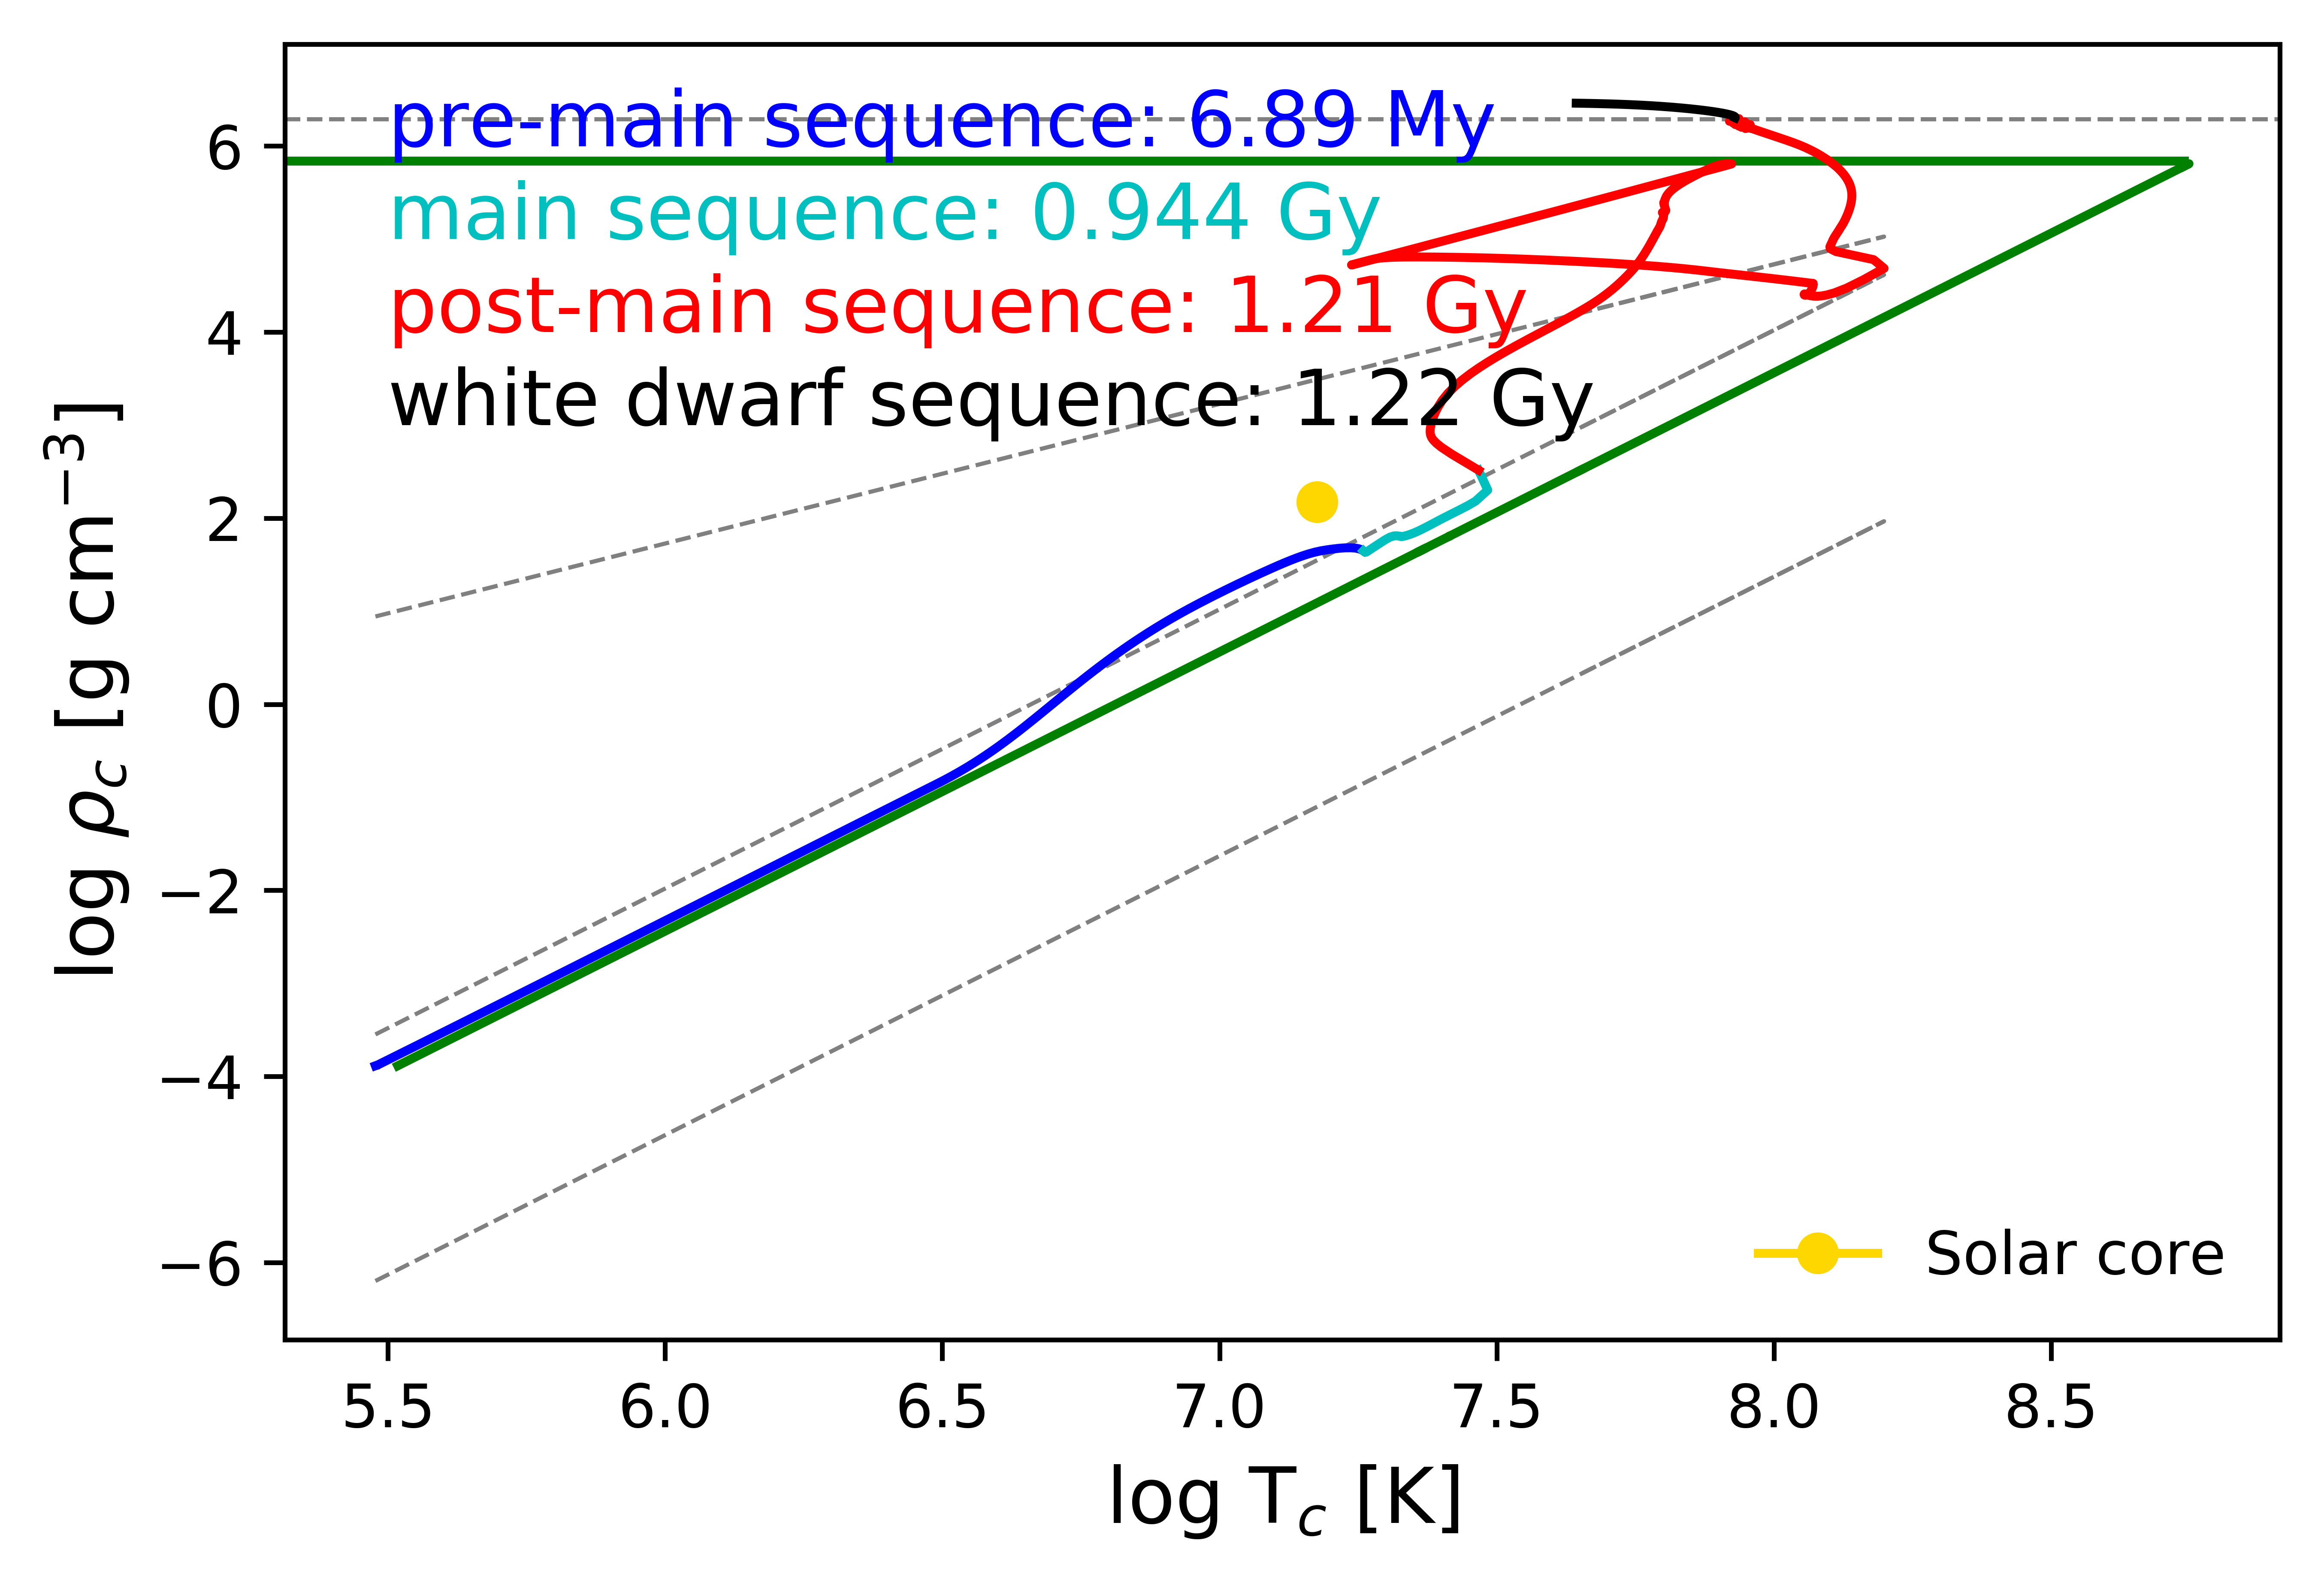

In [15]:
# constants
C = 0.42 # constant varies between 0.48 and 0.36
G = 6.67e-8 # gravitational constant [cm^3⋅g^−1⋅s^−2]
R = 8.3145e7 # gas constant [erg/deg-mol]
M = 2*1.989e33 # 2M_sun
mu = 0.7681 # inferred avg molecular weight of main sequence from np.mean(h.center_mu[248:301])
mu_e = 2 # from pg 27 in notes, for degenerate gases

# stellar core: temperature vs density
rho_solar_core = np.log10(150) # [g/cm**3]
temp_solar_core = np.log10(1.5e7) # [K]

# equations of state: radiation, ideal gas, nonrelativistic, relativistic
# T_core = np.
prad_pgas = np.log10(((10**h.log_center_T)/(3.2e7*mu**(-1/3)))**3) # where P_rad = P_gas
pnr = np.log10(((10**h.log_center_T)/(1.21e5*mu*1.18**(-5/3)))**(3/2)) # where P_gas = P_nr; mu_e = 1.18 here
pnr_per = np.log10(9.7e5*mu_e) # P_nr and P_ER boundary
pgas_per = np.log10(((10**h.log_center_T)/(1.5e7*mu*mu_e**(-4/3)))**3)

# 2M model star
T_c_const = (C*G/R)*mu*M**(2/3)
T_c_model = T_c_const*(10**h.log_center_Rho)**(1/3)
logT_c_model = np.log10(T_c_model)
# print(logT_c_model)

# plots
fig = plt.figure(dpi=1000)

# EOS boundaries
plt.plot(h.log_center_T,prad_pgas,ls='--',lw=0.7,c='gray')
plt.plot(h.log_center_T,pnr,ls='--',lw=0.7,c='gray')
plt.axhline(y=pnr_per,ls='--',lw=0.7,c='gray')
plt.plot(h.log_center_T,pgas_per,ls='--',lw=0.7,c='gray')


# 2M model
# plt.plot(logT_c_model, h.log_center_Rho, c='g')
#logT_pre = np.log10(C*G/R*mu*M**(2/3)*h.log_center_Rho[200:249])
#logT_agb = np.log10(C*G/R*mu*M**(2/3)*h.log_center_Rho[300:5801])
#logT_wd = np.log10(C*G/R*mu*M**(2/3)*h.log_center_Rho[5800:])
#plt.plot(logT_pre, h.log_center_Rho[:249], c='g')
#plt.plot(logT_agb, h.log_center_Rho[300:5801], c='g')
#plt.plot(logT_agb, h.log_center_Rho[5800:], c='g')
K_nr = 1.0036e13 # [cgs] eq 3.35 in notes 
rho_nr = np.log10(((C*G/K_nr)**3)*mu_e*M**2) 
logT_pre = np.log10((C*G/R*mu*M**(2/3))*(10**h.log_center_Rho[:249])**(1/3)) 
logT_main = np.log10((C*G/R*mu*M**(2/3))*(10**h.log_center_Rho[248:301])**(1/3)) 
logT_agb = np.log10((C*G/R*mu*M**(2/3))*(10**h.log_center_Rho[300:1200])**(1/3)) 
plt.plot(logT_pre, h.log_center_Rho[:249], c='g') 
plt.plot(logT_main, h.log_center_Rho[248:301], c='g') 
plt.plot(logT_agb, h.log_center_Rho[300:1200], c='g') 
plt.axhline(y=rho_nr,xmax=0.952,c='g')

# mesa model
plt.plot(h.log_center_T[:249], h.log_center_Rho[:249], c='b')
plt.plot(h.log_center_T[248:301], h.log_center_Rho[248:301], c='c')
plt.plot(h.log_center_T[300:5801], h.log_center_Rho[300:5801], c='r')
plt.plot(h.log_center_T[5800:], h.log_center_Rho[5800:], c='k')
plt.plot(temp_solar_core, rho_solar_core, marker='o', c='gold', label='Solar core')

# annotations for age and sequences
plt.annotate('pre-main sequence: 6.89 My',color='b',xy=(5.5,6),xytext=(5.5,6),fontsize=13)
plt.annotate('main sequence: 0.944 Gy',color='c',xy=(5.5,5),xytext=(5.5,5),fontsize=13)
plt.annotate('post-main sequence: 1.21 Gy',color='r',xy=(5.5,4),xytext=(5.5,4),fontsize=13)
plt.annotate('white dwarf sequence: 1.22 Gy',color='k',xy=(5.5,3),xytext=(5.5,3),fontsize=13)

# aesthetics
#plt.xlim(np.min(h.log_center_T),np.max(h.log_center_T)+.015)
plt.xlabel(r'log T$_c$ [K]', fontsize = 13)
plt.ylabel(r'log $\rho_c$ [g cm$^{-3}$]', fontsize = 13)
plt.legend(loc='lower right',frameon=False)

# plt.savefig('Tc_rhoc.png')
plt.show()

0.006899348742911126
0.9438995557572025
1.2096352805328596
1.2245229059988216


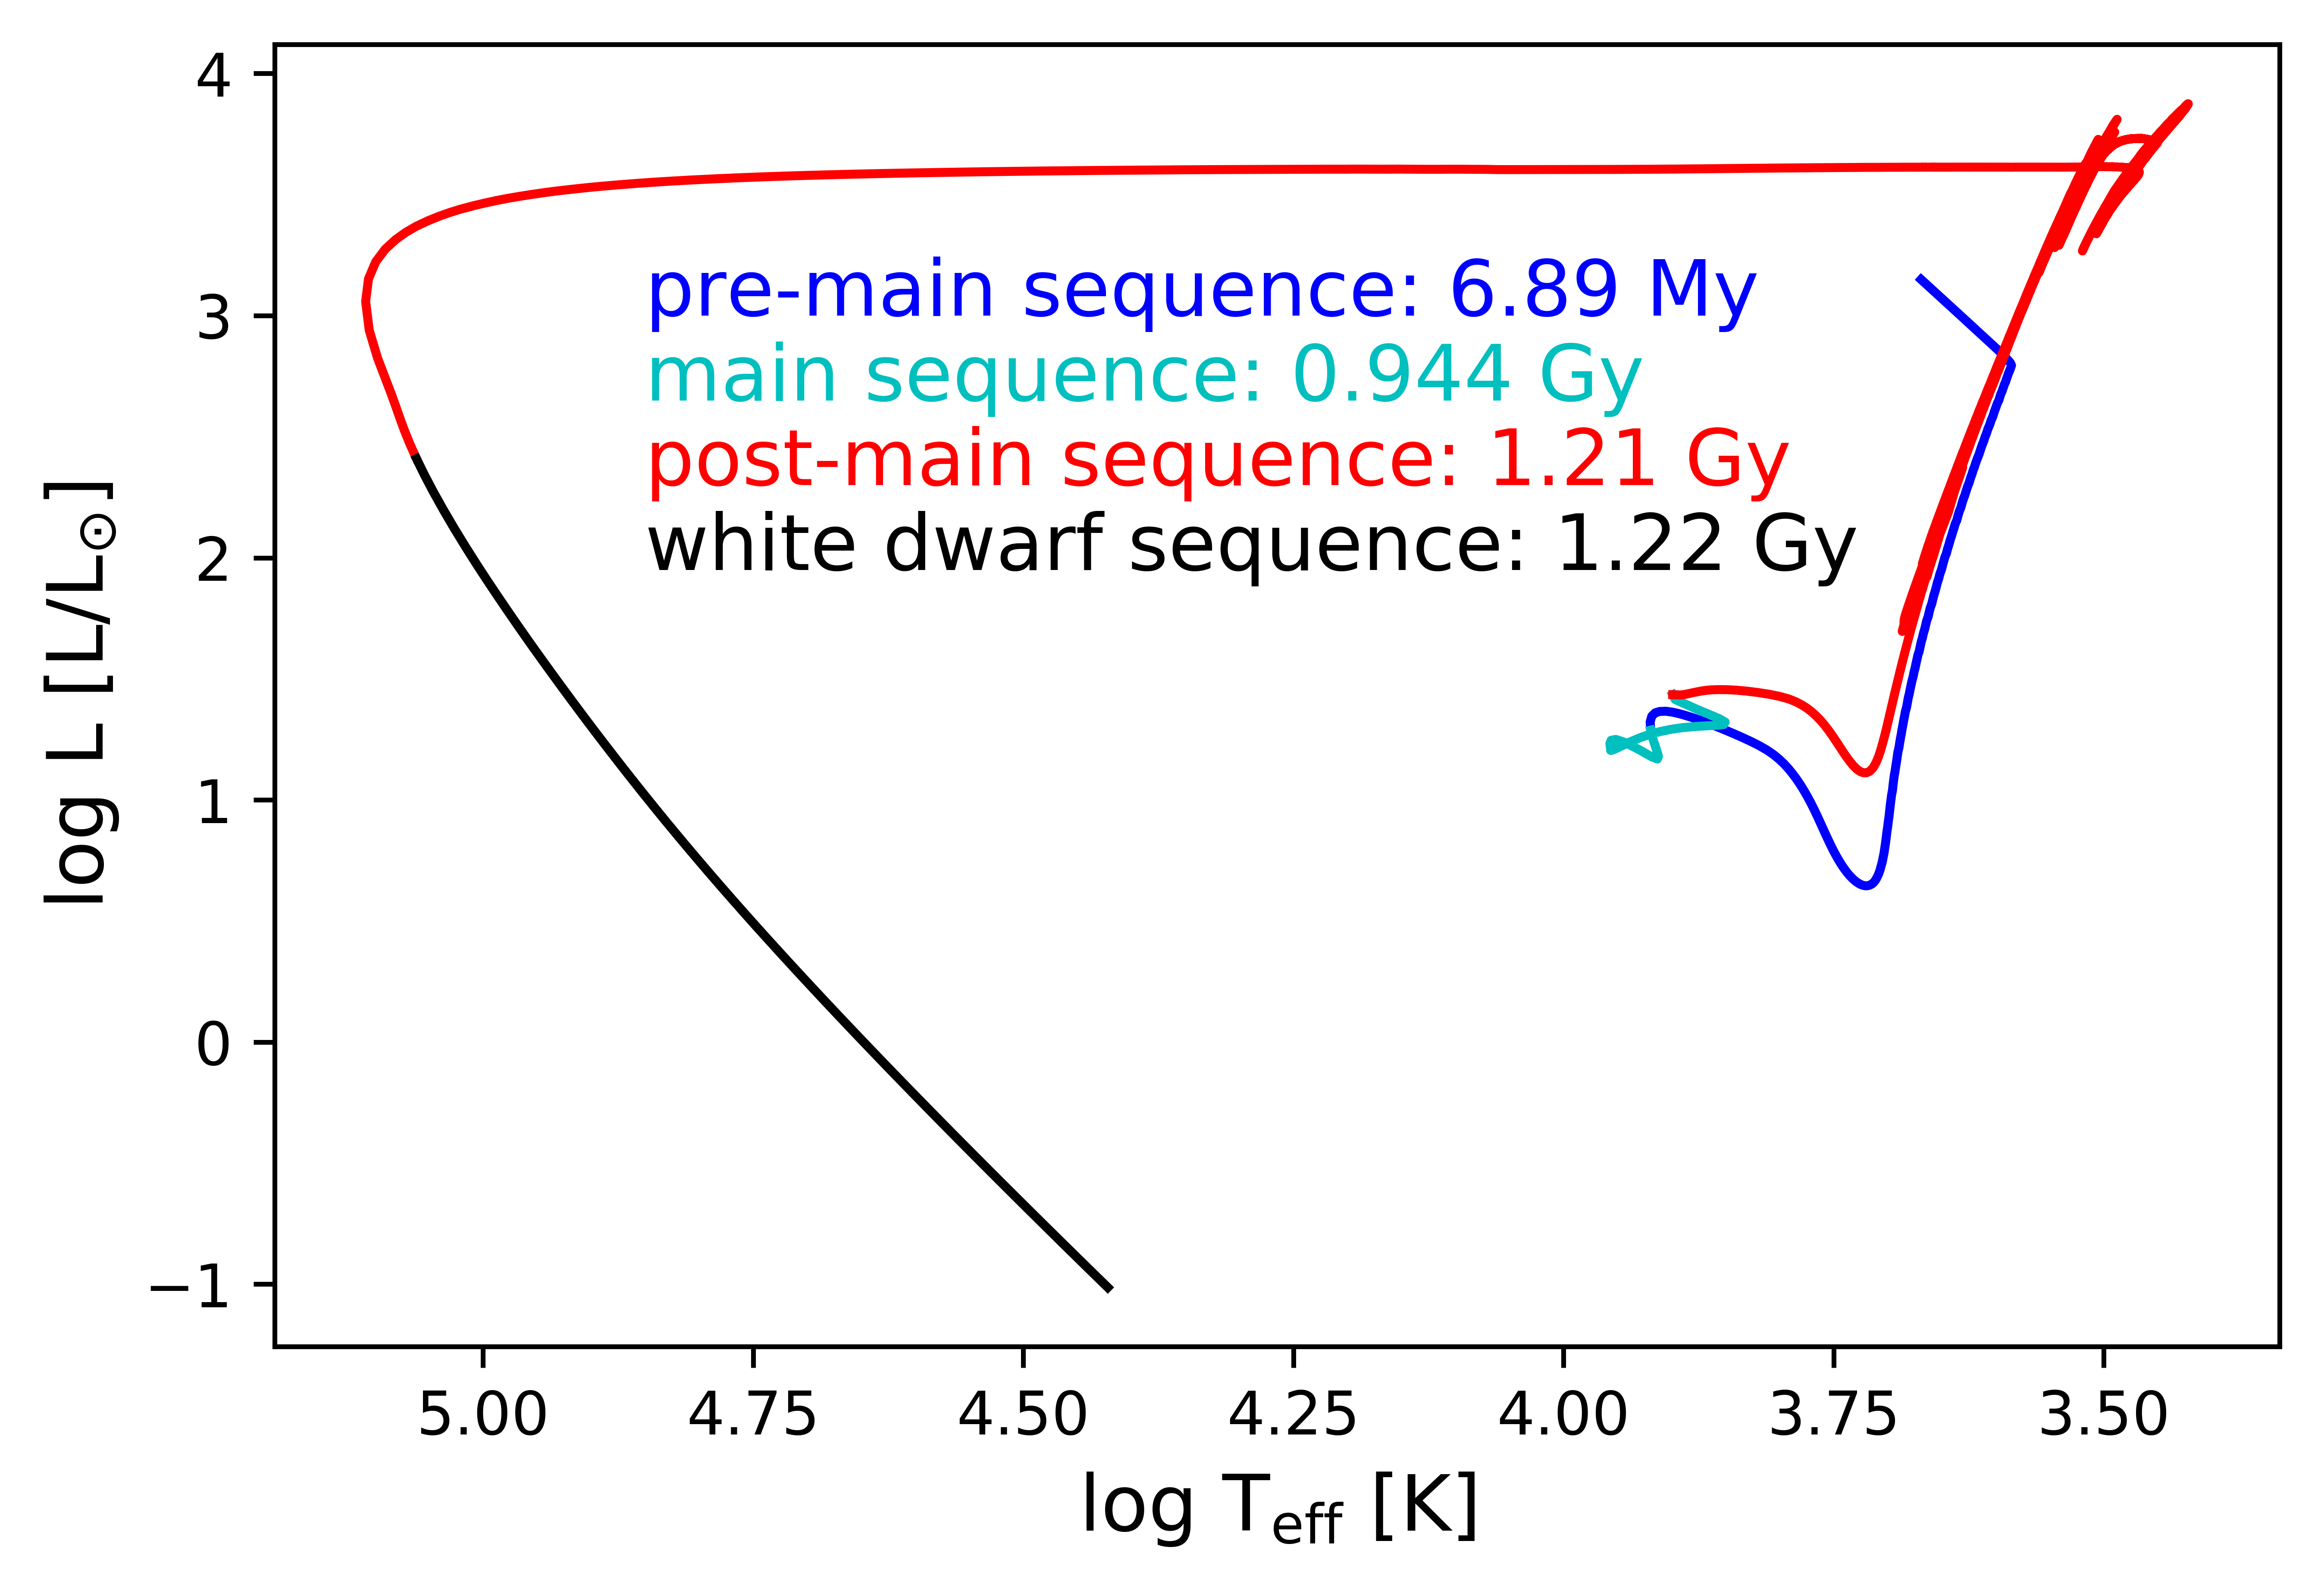

In [9]:
fig = plt.figure(dpi=1000)

# hr diagram
plt.plot(h.log_Teff[0:249],h.log_L[0:249],c='b') # pre-main sequence
prems_age = h.star_age[249]
print(prems_age/1e9)

plt.plot(h.log_Teff[248:301],h.log_L[248:301],c='c') # main sequence
ms_age = h.star_age[301]
print(ms_age/1e9)

plt.plot(h.log_Teff[300:5801],h.log_L[300:5801],c='r') # red-giant branch (agb) phase
agb_age = h.star_age[5801]
print(agb_age/1e9)

plt.plot(h.log_Teff[5800:],h.log_L[5800:],c='k') # white dwarf ascension
wd_age = h.star_age[5864]
print(wd_age/1e9)

# annotations
plt.annotate('pre-main sequence: 6.89 My',color='b',xy=(4.85,3),xytext=(4.85,3),fontsize=13)
plt.annotate('main sequence: 0.944 Gy',color='c',xy=(4.85,2.65),xytext=(4.85,2.65),fontsize=13)
plt.annotate('post-main sequence: 1.21 Gy',color='r',xy=(4.85,2.3),xytext=(4.85,2.3),fontsize=13)
plt.annotate('white dwarf sequence: 1.22 Gy',color='k',xy=(4.85,1.95),xytext=(4.85,1.95),fontsize=13)

# aesthetics 
plt.xlabel('log T$_{\mathrm{eff}}$ [K]',fontsize = 13)
plt.ylabel(r'log L [L/L$_{\odot}$]',fontsize = 13)
plt.gca().invert_xaxis()

# plt.savefig('hr.png')
plt.show()

profile is 6e-05 billion years old


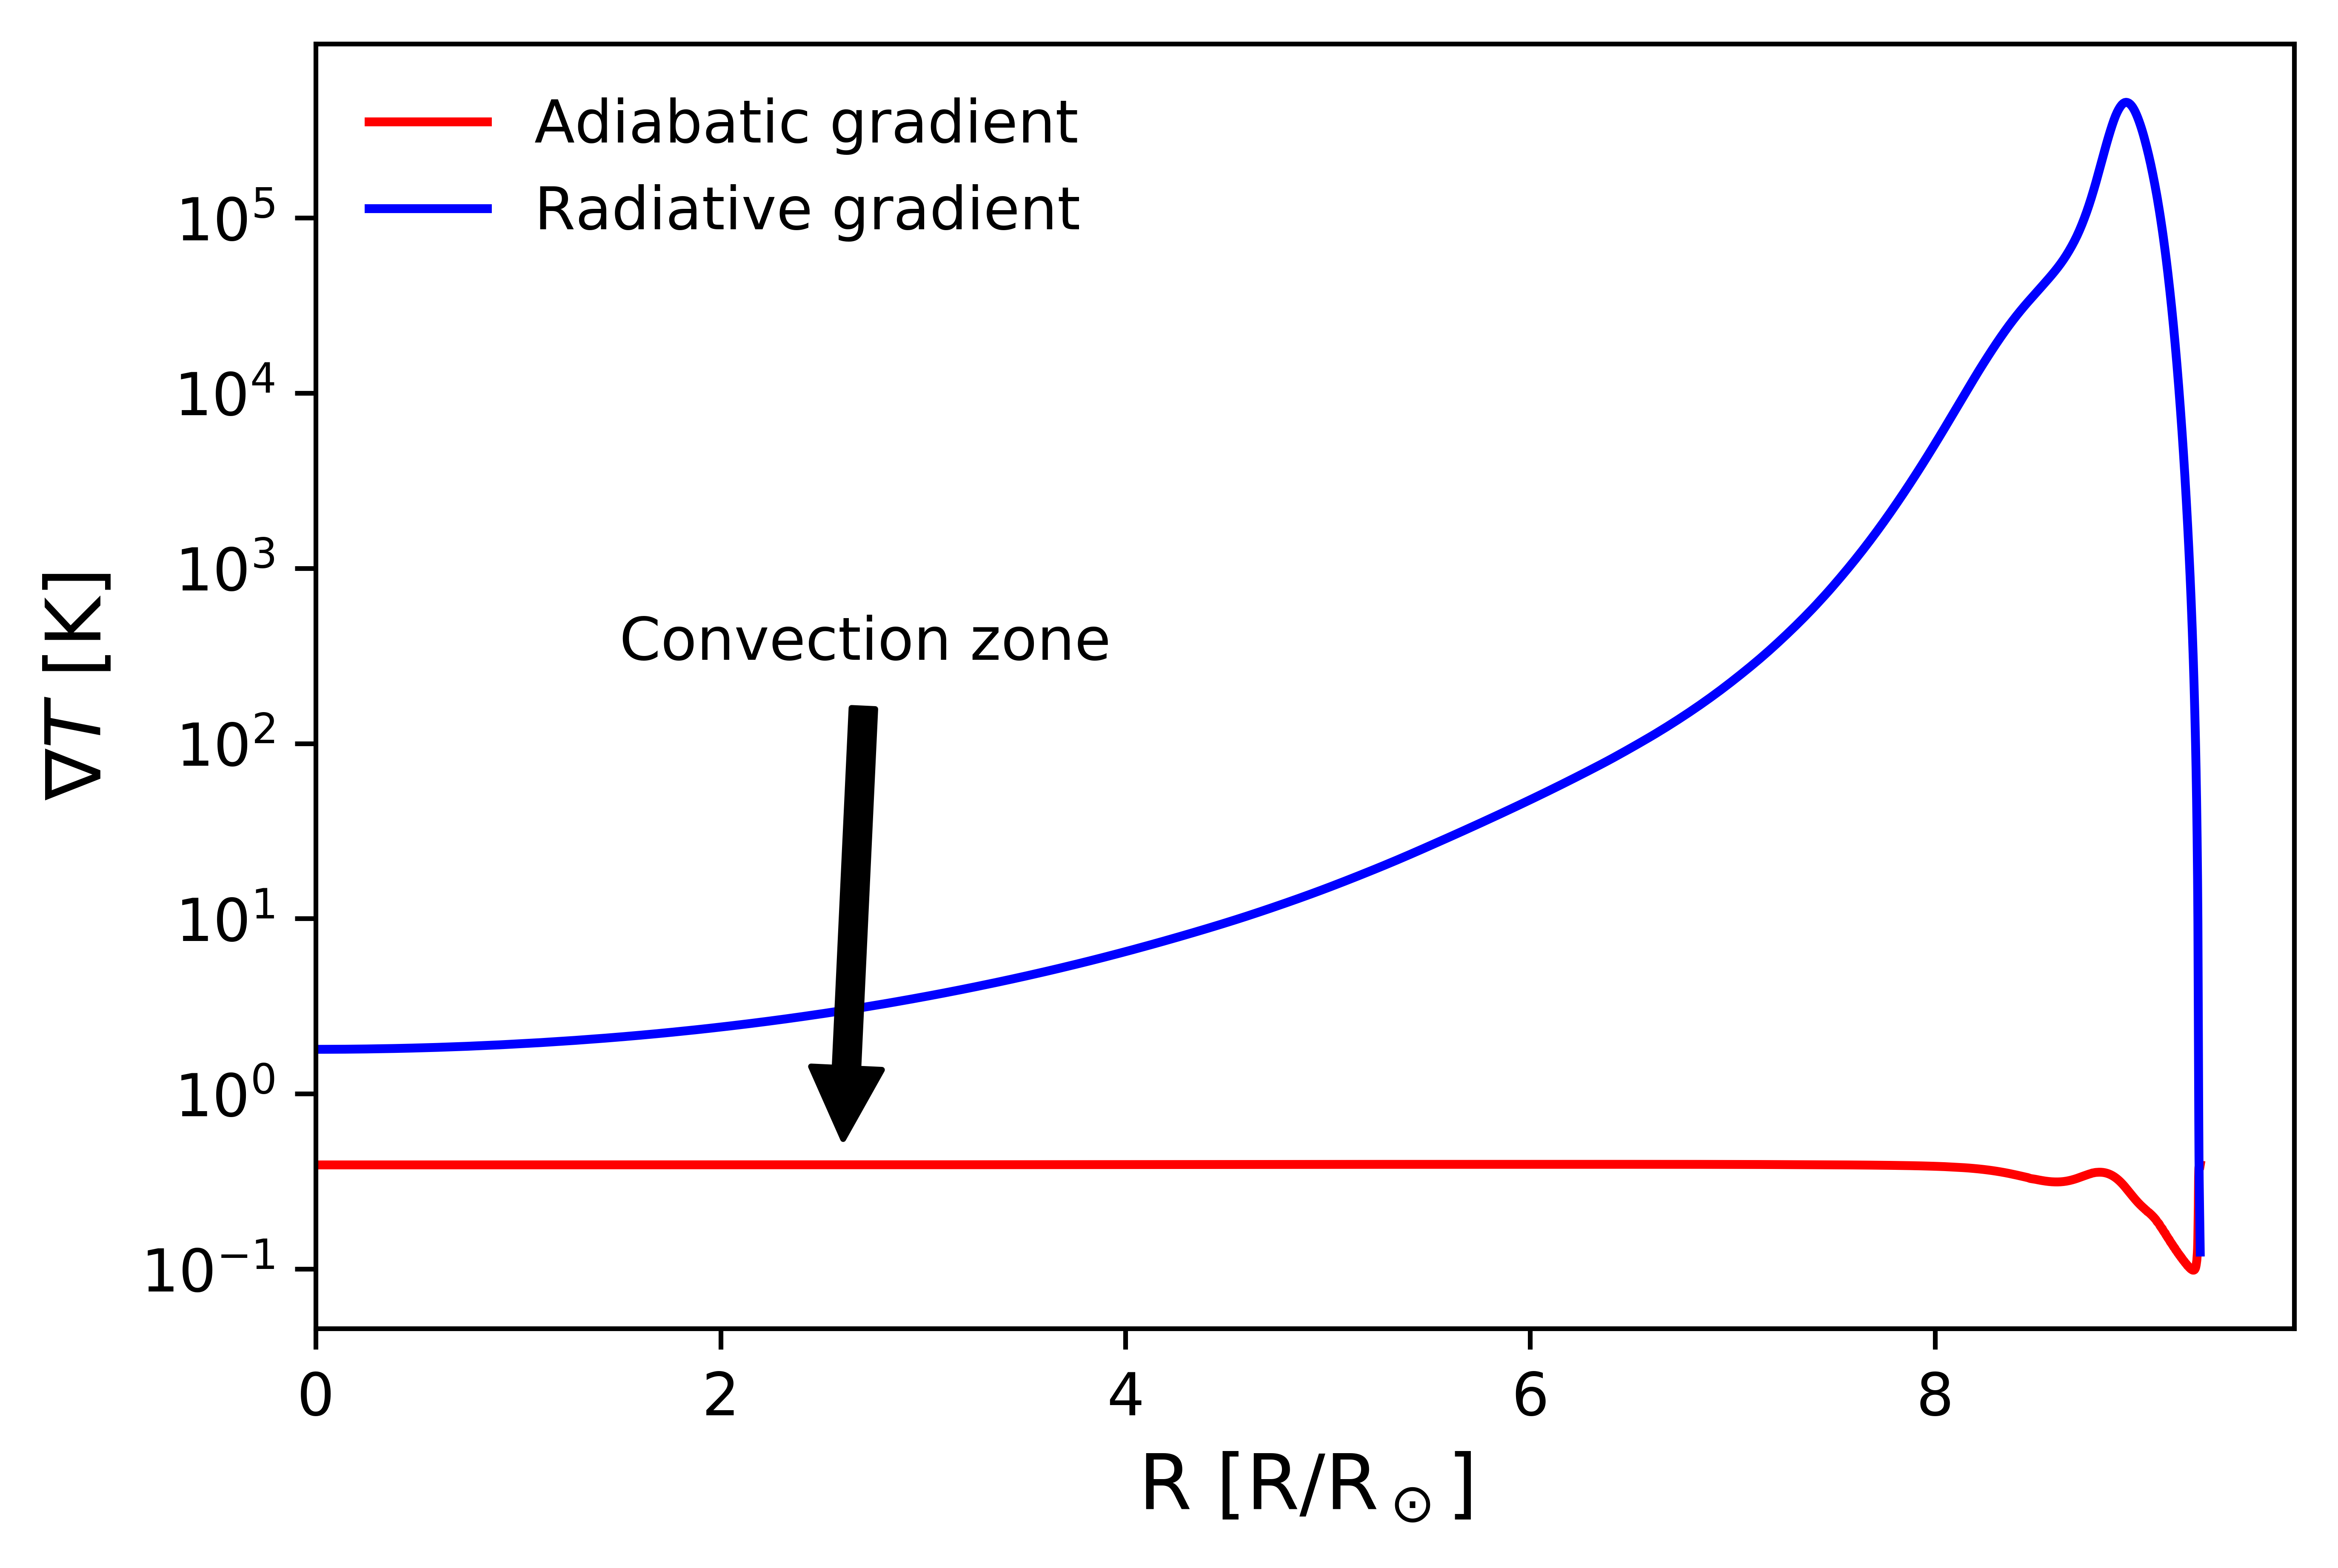

In [18]:
# convection in the pre-main sequence
fig = plt.figure(dpi=1000)
pre_ms = l.profile_data(profile_number=4) # pre-main sequence
x = pre_ms.star_age
print(f'profile is {round(x/1e9,5)} billion years old')
plt.semilogy(pre_ms.R,pre_ms.grada,c='r',label='Adiabatic gradient')
plt.semilogy(pre_ms.R,pre_ms.gradr,c='b',label='Radiative gradient')

plt.annotate('Convection zone', xy=(2.6, 0.4), xytext=(1.5, 300),arrowprops=dict(facecolor='k', shrink=0.05))

# aesthetics
plt.minorticks_off()
plt.xlim(0)
# plt.ylim()
plt.xlabel(r'R [R/R$_\odot$]',fontsize = 13)
plt.ylabel(r'$\nabla T$ [K]',fontsize = 13)
plt.legend(frameon=False)

# plt.savefig('pre-ms-conv.png')
plt.show()

profile is 0.655935 billion years old


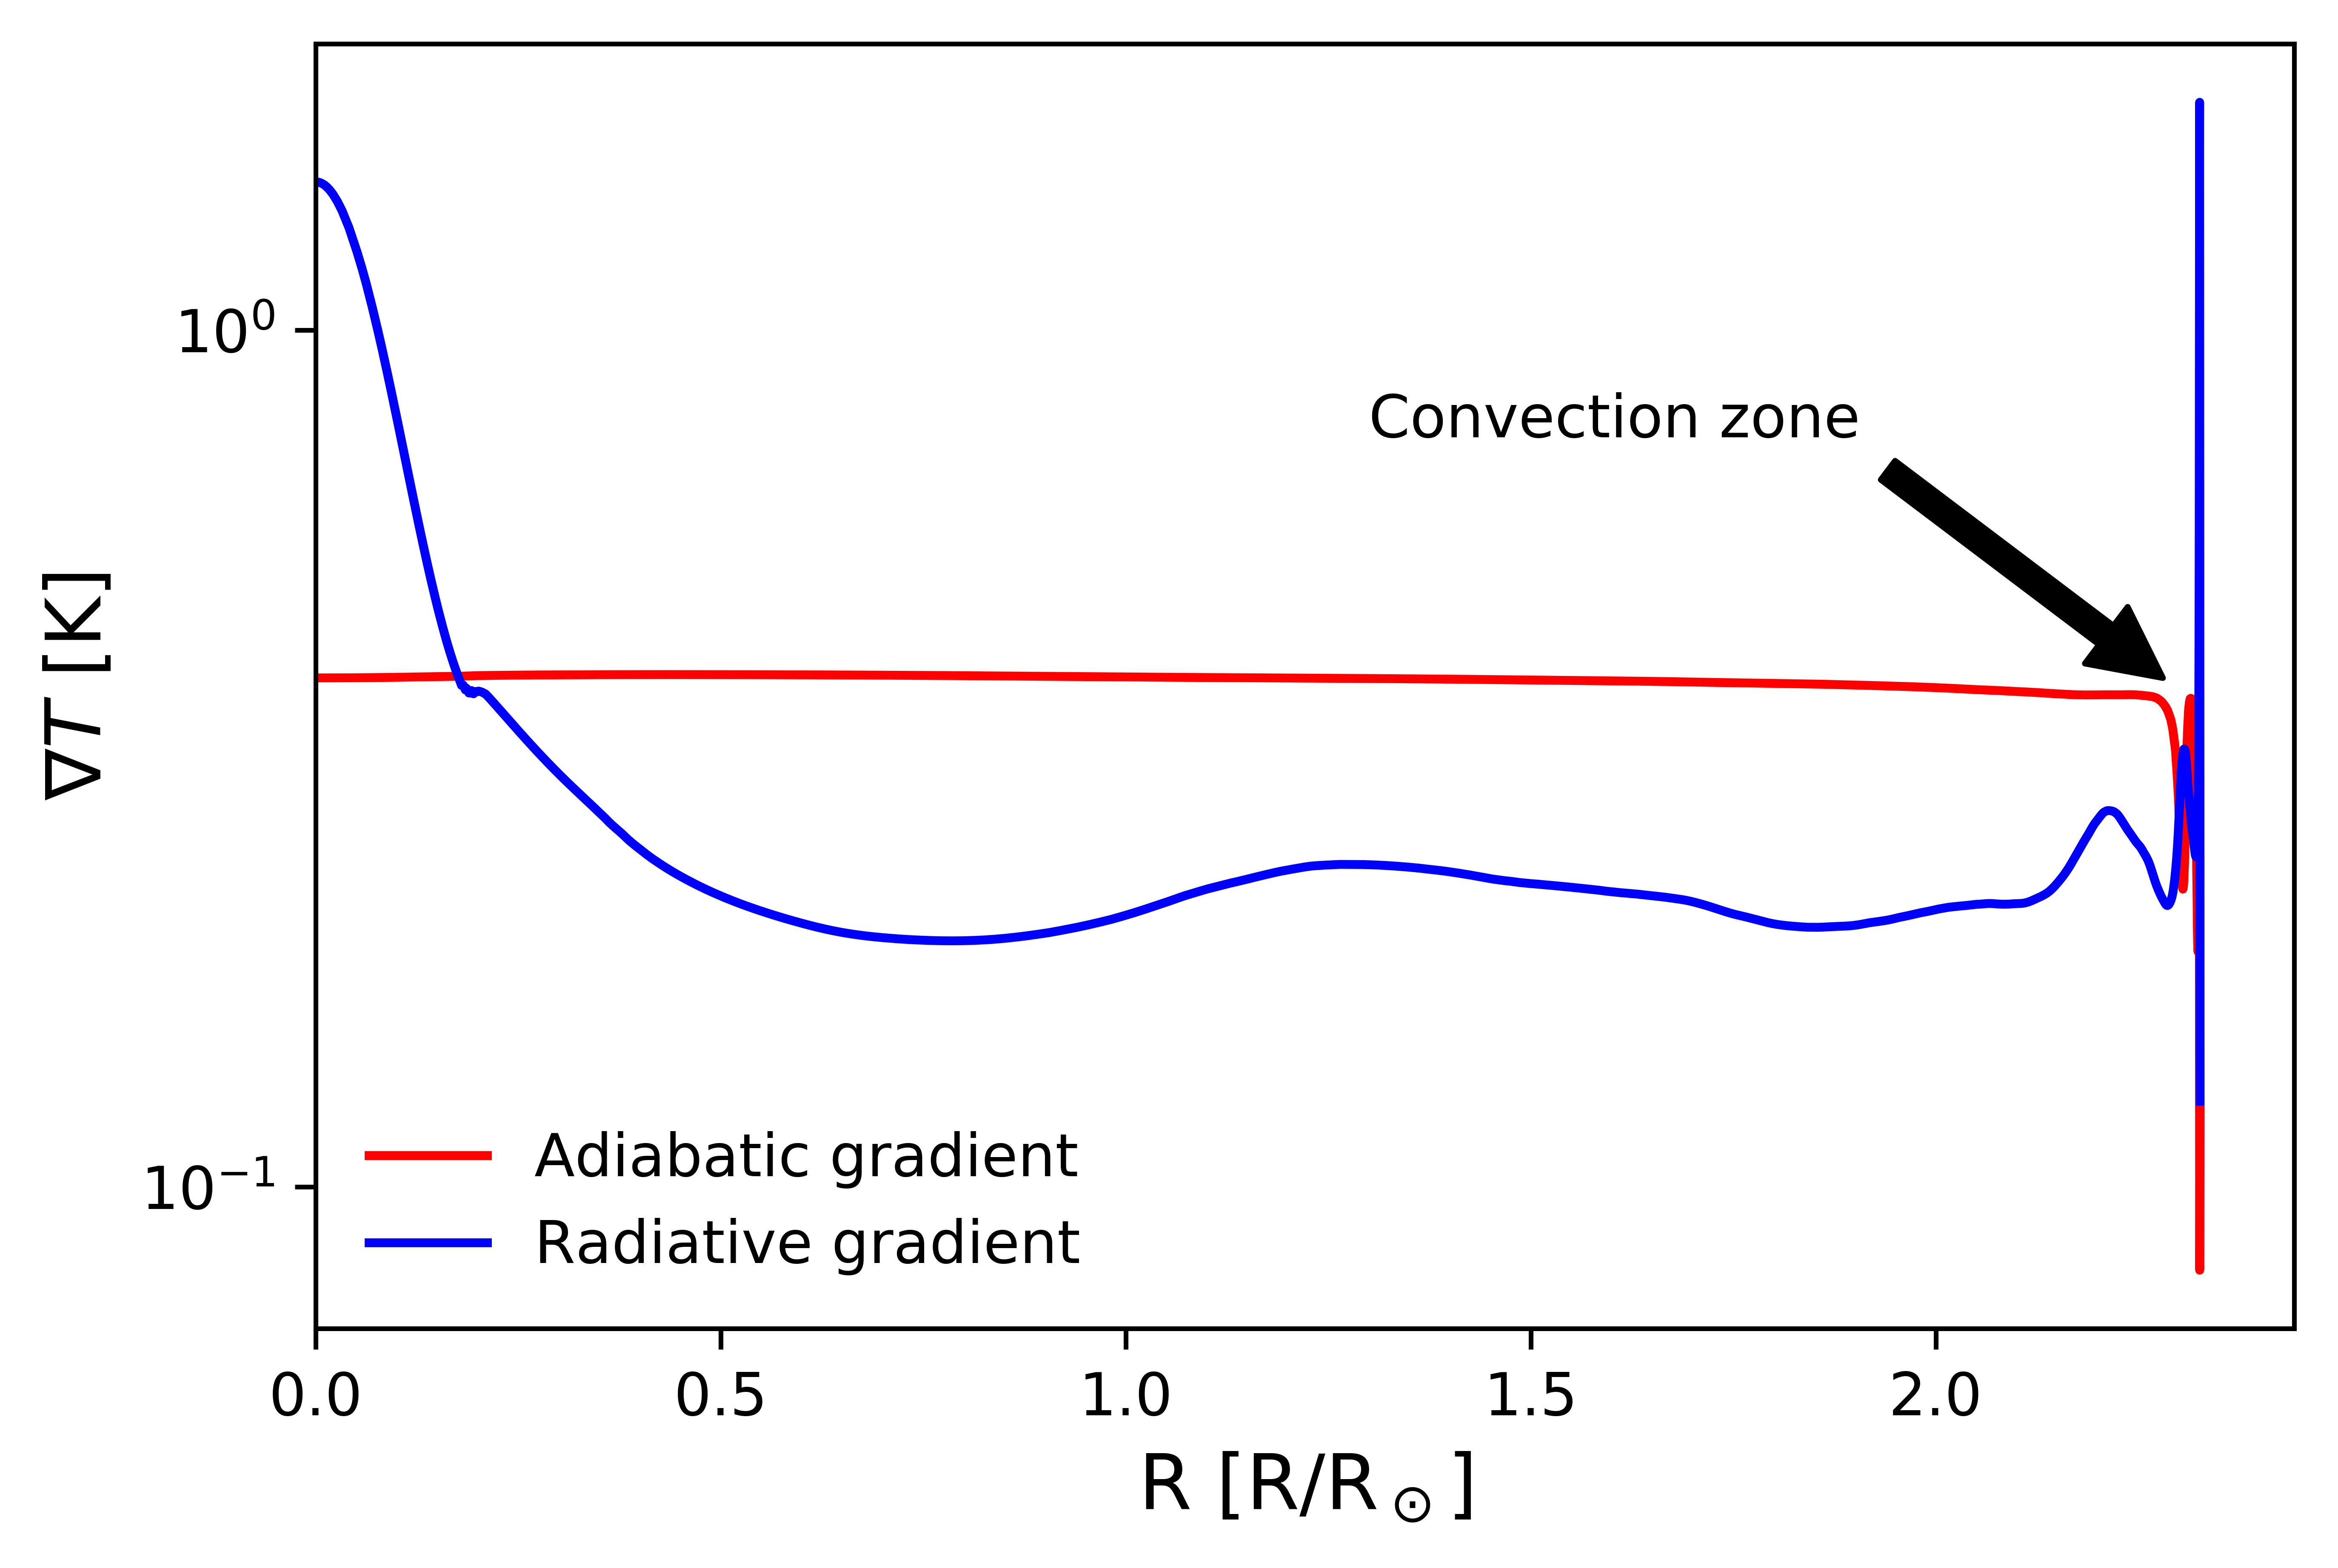

In [20]:
# convection in the main sequence
fig = plt.figure(dpi=1000)
ms = l.profile_data(profile_number=8) # main sequence
y = ms.star_age
print(f'profile is {round(y/1e9,6)} billion years old')
plt.semilogy(ms.R,ms.grada,c='r',label='Adiabatic gradient')
plt.semilogy(ms.R,ms.gradr,c='b',label='Radiative gradient')

plt.annotate('Convection zone', xy=(2.3, 0.38), xytext=(1.3, 0.75),arrowprops=dict(facecolor='k', shrink=0.05))

# aesthetics
plt.minorticks_off()
plt.xlim(0)
plt.yticks([0.1,1])
plt.xlabel(r'R [R/R$_\odot$]', fontsize = 13)
plt.ylabel(r'$\nabla T$ [K]', fontsize = 13)
plt.legend(frameon=False)

# plt.savefig('ms-conv.png')
plt.show()